In [13]:
%matplotlib inline
from fastai import *

# SGD

In [14]:
n=100
## n is the rows, 2 is the columns
## every single thing in it will be a 1﹣that's what torch.ones means.
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.3624,  1.0000],
        [-0.4408,  1.0000],
        [ 0.0082,  1.0000],
        [ 0.3495,  1.0000],
        [-0.7768,  1.0000]])

In [15]:
### A tensor is any array which has a rectangular or cube or whatever ﹣ a shape where every row 
### is the same length and every column is the same length. 
a = tensor(3.,2)
a

tensor([3., 2.])

e.g. tensor 
4 by 3 matrix
A vector of length 4
A 3D array of length 3 by 4 by 6

For example, an image is a 3 dimensional tensor. It's got number of rows by number of columns by number of channels 
(normally red, green, blue).
rank means how many dimensions there

Here is another very important concept in PyTorch. Anytime you've got a function that ends with an underscore, 
it means don't return to me that uniform random number, but replace whatever this is being called on with the result of this function

In [16]:
y = x@a + torch.rand(n)

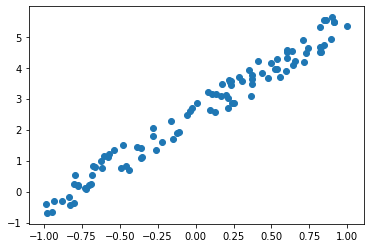

In [17]:
plt.scatter(x[:,0], y);

In [18]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

let's say we guess that a_1 and a_2 are -1 and 1.

In [19]:
a = tensor(-1.,1)

In [20]:
a.type()

'torch.FloatTensor'

In [21]:
y_hat = x@a
mse(y_hat, y)

tensor(8.3173)

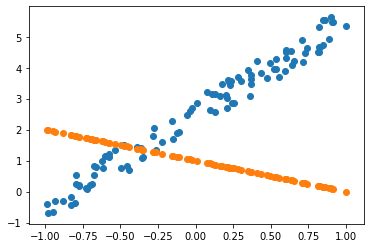

In [22]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

# gradient descent

In [25]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [26]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

Learning rate: A thing we multiply our gradient by to decide how much to update the weights by.

Epoch: One complete run through all of our data points (e.g. all of our images). So for non-stochastic gradient descent we just did, every single loop, we did the entire dataset. But if you've got a dataset with a thousand images and our mini-batch size is 100, then it would take you 10 iterations to see every image once. So that would be one epoch. Epochs are important because if you do lots of epochs, then you are looking at your images lots of times, so every time you see an image, there's a bigger chance of overfitting. So we generally don't want to do too many epochs.

Mini-batch: A random bunch of points that you use to update your weights.

SGD: Stochastic gradient descent using mini-batches.

Model / Architecture: They kind of mean the same thing. In this case, our architecture is \vec{y} = X\vec{a}﹣ the architecture is the mathematical function that you're fitting the parameters to. And we're going to learn later today or next week what the mathematical function of things like ResNet34 actually is. But it's basically pretty much what you've just seen. It's a bunch of matrix products.

Parameters / Coefficients / Weights: Numbers that you are updating.

Loss function: The thing that's telling you how far away or how close you are to the correct answer. For classification problems, we use cross entropy loss, also known as negative log likelihood loss. This penalizes incorrect confident predictions, and correct unconfident predictions.